# IA - Assignment 2
## Yelp Reviews
Group: 85_3c

### Parsing the reviews from the train and test datasets
We used the library pandas to read the data from the trainning and testing files into apropriate data structures.

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split



dataset_train = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')

### Observing the distribution of the reviews and its values.

Dataset trainning
1    130000
2    130000
3    130000
4    130000
5    130000
Name: class_index, dtype: int64
1    0.2
2    0.2
3    0.2
4    0.2
5    0.2
Name: class_index, dtype: float64


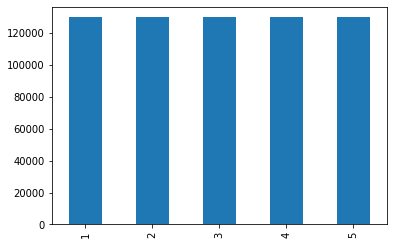


Dataset test
1    10000
2    10000
3    10000
4    10000
5    10000
Name: class_index, dtype: int64
1    0.2
2    0.2
3    0.2
4    0.2
5    0.2
Name: class_index, dtype: float64


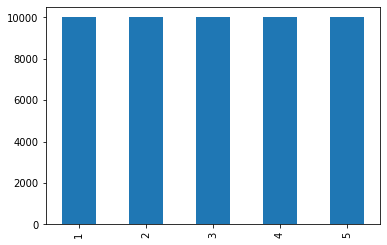

In [117]:
print("Dataset trainning")
print(dataset_train['class_index'].value_counts().sort_index())
print(dataset_train['class_index'].value_counts(ascending=True, normalize=True).sort_index())

dataset_train['class_index'].value_counts().sort_index().plot(kind='bar')
plt.show()

print("\nDataset test")
print(dataset_test['class_index'].value_counts().sort_index())
print(dataset_test['class_index'].value_counts(ascending=True, normalize=True).sort_index())

dataset_test['class_index'].value_counts().sort_index().plot(kind='bar')
plt.show()


### Sampling the trainning data set
In order to speed up the normalization of the data set and trainning, we chose to initially take 1 000 random samples for each of the review types (one start, two stars etc) and work with this minimal data set.


In [118]:
rslt_df = [dataset_train[dataset_train['class_index'] == (i+1)].sample(1000) for i in range(0, 5)]

minimal_dataset_train = pd.concat(rslt_df) 

print(len(minimal_dataset_train))

minimal_dataset_train = minimal_dataset_train.reset_index()
print(minimal_dataset_train.head(15))

5000
     index  class_index                                        review_text
0   258852            1  Still waiting for them to cancel my account, h...
1   527457            1  Had family visit. Took my dad here on a Fri ni...
2   298119            1  We came to this place on our first night in Ve...
3   431136            1  What a terrible experience.  I needed a manicu...
4    68185            1  This is regarding my Black Friday experience. ...
5   499687            1  Was visiting Edinburgh for a night and the nex...
6   250932            1  Don't plan to go here if it's anywhere near cl...
7    35347            1  We took my mom in for her first outing after s...
8   103049            1  We had girl's night dinner here and had a horr...
9   516106            1  I honestly don't get why people go crazy for t...
10  446960            1  Let's see....where to begin. There was so much...
11  582992            1  Please don't go to a lady named Betty. I thoug...
12  550737          

### Remove non alphabetic characters, lower casing words, stemming, stop words

In [119]:
minimal_dataset_train_clean = []
ps = PorterStemmer()

minimal_dataset_train = minimal_dataset_train.reset_index()

for i in range(0, minimal_dataset_train['review_text'].size):
    if((i+1)%1000 == 0):
        print("Done with {} reviews out of {}".format(i+1, minimal_dataset_train['review_text'].size))
    
    review = re.sub('[^a-zA-Z]', ' ', minimal_dataset_train['review_text'][i])
    review = review.lower()
    review = ' '.join([ps.stem(w) for w in review.split() if not w in set(stopwords.words('english'))])

    minimal_dataset_train_clean.append(review)


Done with 1000 reviews out of 5000
Done with 2000 reviews out of 5000
Done with 3000 reviews out of 5000
Done with 4000 reviews out of 5000
Done with 5000 reviews out of 5000


### Wordclouds for each of the review types (one star, two stars, etc)

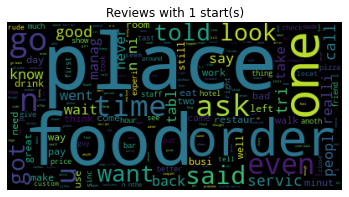

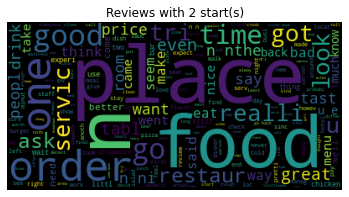

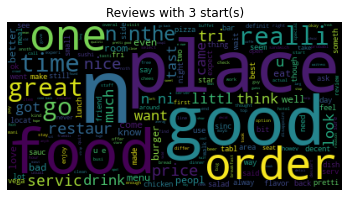

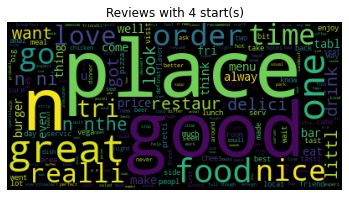

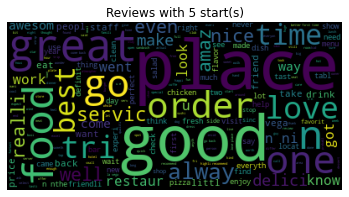

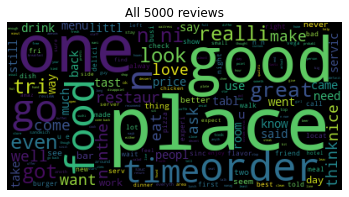

In [120]:
for i in range(0, 5):
    wordcloud = WordCloud().generate(" ".join(minimal_dataset_train_clean[i*1000:(i+1)*1000]))
    plt.title("Reviews with " + str(i+1) + " start(s)")
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

wordcloud = WordCloud().generate(" ".join(minimal_dataset_train_clean))
plt.title("All 5000 reviews")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


### Generating a data set
Create a *bag-of-words* model


In [121]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(minimal_dataset_train_clean).toarray()

print(X.shape)
print(vectorizer.get_feature_names_out())

print(minimal_dataset_train_clean[0])
for i in range(0, len(X[0])):
    if(X[0][i] != 0):
        print(X[0][i], end=" ")

(5000, 16083)
['aaa' 'aaaaaaahhhhhh' 'aaaaaand' ... 'zwar' 'zweiten' 'zwiebeln']
still wait cancel account talk differ area told could anyth continu tell friend cowork avoid vet
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [122]:
y = minimal_dataset_train['class_index']

print(X.shape, y.shape)

(5000, 16083) (5000,)


### Training classifiers

#### Spliting the data

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("\nLabel distribution in the training set:")
print(y_train.value_counts())

print("\nLabel distribution in the test set:")
print(y_test.value_counts())

(4000, 16083) (4000,)
(1000, 16083) (1000,)

Label distribution in the training set:
3    812
1    808
2    803
5    790
4    787
Name: class_index, dtype: int64

Label distribution in the test set:
4    213
5    210
2    197
1    192
3    188
Name: class_index, dtype: int64


#### Naive Bayes MultinomialNB

In [124]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [125]:
y_pred = clf.predict(X_test)
print(y_pred)

[2 1 3 2 1 5 3 5 1 1 1 4 4 5 2 4 5 1 4 4 4 1 5 4 3 5 2 1 1 3 4 3 4 1 4 5 5
 1 2 2 2 2 4 2 2 1 4 5 1 1 4 2 3 1 1 4 4 4 3 4 4 5 4 2 1 1 2 1 4 2 4 4 3 4
 1 4 1 1 3 4 5 4 3 4 2 3 1 1 1 2 1 2 1 3 3 1 3 1 2 4 3 3 5 2 1 4 2 5 4 5 1
 4 3 3 4 1 3 2 5 2 5 2 5 4 2 3 2 4 3 4 3 3 3 1 1 3 3 4 1 2 3 3 1 2 4 3 3 5
 5 3 4 1 1 1 1 4 4 2 3 2 5 2 3 1 1 4 3 4 1 1 4 1 1 3 2 5 4 5 4 4 5 3 1 4 5
 5 2 2 2 2 3 1 1 4 5 1 3 5 2 5 5 4 1 2 3 3 3 3 2 4 4 3 4 3 3 2 1 1 3 4 2 1
 4 1 5 1 2 5 2 1 4 3 2 4 3 2 5 2 4 3 3 4 2 1 2 1 3 4 1 1 3 3 4 1 5 5 5 1 1
 1 3 4 4 4 1 2 5 4 1 5 1 1 2 3 1 1 4 5 1 3 1 5 2 4 3 1 1 4 1 1 1 3 3 4 1 2
 5 1 4 1 3 3 1 3 4 2 5 2 1 2 4 3 3 1 1 4 3 1 5 5 2 4 4 1 1 1 1 5 5 1 2 5 3
 2 5 4 3 3 3 4 5 5 5 3 3 2 3 3 1 3 2 3 3 4 4 2 5 2 2 2 3 5 4 3 3 3 3 5 3 1
 1 4 2 1 1 5 5 2 3 4 4 4 4 3 3 1 5 2 5 2 3 5 2 2 2 4 2 1 5 1 5 5 1 5 4 3 4
 2 5 5 3 4 3 1 1 1 1 4 3 4 1 3 5 3 1 1 3 4 4 5 1 2 5 4 5 4 3 2 2 1 4 1 2 2
 2 3 3 5 3 2 3 2 5 5 1 3 2 4 5 4 3 3 3 1 3 3 4 1 2 2 3 1 3 5 1 4 4 4 4 4 1
 3 2 5 3 5 2 4 1 4 1 3 2 

#### Performance of the model

In [127]:


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))

Confusion Matrix:
 [[139  39   8   4   2]
 [ 61  66  57   9   4]
 [ 21  36  92  32   7]
 [  6  16  68  91  32]
 [ 14  17  20  69  90]]
Accuracy score: 0.478


#### Testing the model
We took 1000 samples from the test data set and tested with the current model

In [128]:
dataset_test_sample = dataset_test.sample(1000)
dataset_test_sample = dataset_test_sample.reset_index()
hits = 0
almostHits = 0
predictions_probability = [0, 0, 0, 0, 0]
for i in range(0, dataset_test_sample['review_text'].size):
    
    review = re.sub('[^a-zA-Z]', ' ', dataset_test_sample['review_text'][i])
    review = review.lower()
    review = ' '.join([ps.stem(w) for w in review.split() if not w in set(stopwords.words('english'))])


    V = vectorizer.transform([review]).toarray()
    predict = clf.predict(V)
    predict_probability = clf.predict_proba(V)

    if(dataset_test_sample['class_index'][i] == predict):
        hits += 1
    elif(dataset_test_sample['class_index'][i] == predict + 1 or dataset_test_sample['class_index'][i] == predict - 1):
        almostHits += 1


print("Hits {}".format(hits))
print("almostHits {}".format(almostHits))
print("misses {}".format(1000-hits-almostHits))


Hits 451
almostHits 392
misses 157


### Generating a data set
Using Term Frequency — Inverse Document Frequency

In [129]:
tfidf = TfidfVectorizer(max_features = 20000)
tfidf.fit(minimal_dataset_train_clean)
tfidf_data = tfidf.transform(minimal_dataset_train_clean)
print(tfidf_data)

  (0, 15486)	0.16008370593534874
  (0, 15306)	0.3871694034995944
  (0, 14540)	0.1909358337337037
  (0, 14239)	0.21291872775596146
  (0, 14110)	0.22231440349194068
  (0, 13678)	0.17482443642074183
  (0, 5272)	0.17971947727201765
  (0, 3660)	0.19672506655636163
  (0, 3042)	0.34039031661896496
  (0, 3003)	0.15641284170819536
  (0, 2900)	0.2629490884602398
  (0, 1971)	0.3274251531974247
  (0, 847)	0.2820586537941103
  (0, 628)	0.18607023925535354
  (0, 534)	0.20490972888596337
  (0, 78)	0.34474316394411975
  (1, 15393)	0.13891747072126098
  (1, 15111)	0.2877791066993221
  (1, 14854)	0.18431458476881818
  (1, 14565)	0.13335330397161074
  (1, 13429)	0.14362964462984196
  (1, 11693)	0.0976698015701062
  (1, 10934)	0.07162299971422012
  (1, 10766)	0.14236850472466173
  (1, 10154)	0.21845478662538392
  :	:
  (4999, 10235)	0.06701227481821212
  (4999, 9923)	0.08330852206234325
  (4999, 9366)	0.13743285005806818
  (4999, 9176)	0.0898673752574973
  (4999, 8300)	0.19271378104966666
  (4999, 7764)	0

In [130]:
y = minimal_dataset_train['class_index']

print(tfidf_data.shape, y.shape)

(5000, 16083) (5000,)


In [131]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_data, y, test_size = 0.20)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("\nLabel distribution in the training set:")
print(y_train.value_counts())

print("\nLabel distribution in the test set:")
print(y_test.value_counts())

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(y_pred)

(4000, 16083) (4000,)
(1000, 16083) (1000,)

Label distribution in the training set:
5    810
1    803
2    798
4    795
3    794
Name: class_index, dtype: int64

Label distribution in the test set:
3    206
4    205
2    202
1    197
5    190
Name: class_index, dtype: int64
[1 2 3 2 5 5 1 5 1 1 2 5 1 3 5 1 2 1 1 2 1 1 3 5 1 5 2 2 3 2 1 2 2 5 3 2 4
 2 1 4 4 1 5 4 3 2 5 1 3 3 3 5 4 3 3 2 3 3 3 4 2 4 3 2 3 1 2 1 2 4 2 3 4 2
 4 1 4 3 2 2 3 1 5 1 4 5 1 5 4 1 3 2 1 4 5 3 1 4 2 1 4 1 2 3 3 4 3 3 3 3 2
 2 1 2 1 4 1 4 3 5 2 3 5 2 4 4 3 3 4 4 4 1 1 5 3 4 3 2 1 1 4 2 1 3 4 1 3 2
 2 1 1 1 4 3 4 2 3 5 3 2 2 1 5 4 1 3 2 2 5 2 3 2 1 1 3 3 3 5 3 1 5 3 3 1 4
 4 5 3 1 4 2 3 1 2 3 3 3 5 3 3 4 2 4 4 4 4 4 4 1 5 1 1 4 3 1 4 4 3 3 3 3 5
 5 4 1 4 1 1 2 1 3 2 1 2 2 3 2 2 5 3 2 1 1 2 2 2 4 1 4 4 3 4 1 3 5 4 1 3 2
 4 2 3 1 1 3 2 4 3 2 1 3 5 3 1 2 1 2 2 1 1 5 2 4 3 1 3 2 3 1 1 2 1 3 5 3 5
 5 2 1 5 5 1 4 2 1 1 3 3 1 3 5 3 5 2 1 5 2 2 2 3 2 2 3 2 5 4 5 4 1 4 1 4 4
 3 5 4 4 2 3 4 5 2 4 2 2 3 3 1 2 4 5 3 1 3 1 4 3 

In [132]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))


Confusion Matrix:
 [[136  45  14   1   1]
 [ 61  70  62   8   1]
 [ 18  52  98  31   7]
 [ 11  18  69  78  29]
 [ 16  17  27  55  75]]
Accuracy score: 0.457


In [133]:
hits = 0
almostHits = 0
for i in range(0, dataset_test_sample['review_text'].size):
    
    review = re.sub('[^a-zA-Z]', ' ', dataset_test_sample['review_text'][i])
    review = review.lower()
    review = ' '.join([ps.stem(w) for w in review.split() if not w in set(stopwords.words('english'))])


    V = vectorizer.transform([review]).toarray()
    predict = clf.predict(V)
    predict_probability = clf.predict_proba(V)

    if(dataset_test_sample['class_index'][i] == predict):
        hits += 1
    elif(dataset_test_sample['class_index'][i] == predict + 1 or dataset_test_sample['class_index'][i] == predict - 1):
        almostHits += 1



print("Hits {}".format(hits))
print("almostHits {}".format(almostHits))
print("misses {}".format(1000-hits-almostHits))

Hits 446
almostHits 390
misses 164


### Naive Bayes
ComplementNB

In [134]:
clf = ComplementNB()
clf.fit(X_train, y_train)

ComplementNB()

In [135]:
y_pred = clf.predict(X_test)
print(y_pred)

[1 2 3 2 5 5 1 5 1 1 2 5 1 3 5 1 4 1 1 2 1 1 3 5 1 5 4 4 4 3 1 2 2 5 5 1 5
 2 1 5 5 1 5 4 4 2 5 1 5 3 4 5 4 3 3 2 3 4 4 4 3 4 4 1 3 1 5 1 2 4 2 3 5 2
 4 1 4 4 3 2 3 1 5 5 4 5 1 5 5 1 3 1 1 5 5 3 1 4 1 1 5 1 2 4 4 4 3 5 4 3 2
 1 1 4 1 4 1 4 3 5 2 3 5 1 4 4 3 1 4 4 4 1 1 5 3 5 3 1 1 1 4 2 1 3 4 1 3 1
 2 1 1 1 4 3 4 2 3 5 3 2 4 1 5 4 1 3 2 1 5 2 5 2 1 1 3 3 3 5 3 1 5 3 3 1 4
 4 5 5 1 4 5 3 1 1 4 1 3 5 3 1 4 1 4 4 4 4 4 5 1 5 1 1 5 3 1 4 4 3 3 3 3 5
 5 5 1 4 1 1 2 1 3 2 1 1 1 3 1 1 5 4 5 1 1 4 2 2 4 1 4 5 3 5 1 3 5 5 1 3 3
 2 1 1 1 3 3 2 4 3 2 1 3 5 3 1 2 1 2 2 1 1 5 2 4 1 1 3 2 1 1 1 4 1 4 5 3 5
 5 2 1 5 5 1 4 2 1 1 4 3 1 3 5 3 5 2 1 5 2 1 2 2 1 2 1 2 5 4 5 4 1 4 1 4 4
 3 5 4 5 1 3 4 5 2 4 2 2 5 1 1 2 4 5 3 1 3 1 4 3 4 2 2 5 1 3 4 4 3 4 4 3 3
 1 4 3 3 2 5 1 3 4 2 1 4 3 5 3 4 1 3 1 1 4 3 5 1 3 1 1 1 2 2 4 4 4 4 3 4 3
 5 4 5 3 3 4 1 1 2 5 1 2 3 2 5 1 5 1 4 1 3 1 3 1 4 1 4 4 4 1 2 4 1 1 1 4 2
 5 4 2 1 4 4 1 4 2 5 5 1 1 1 1 1 1 1 1 1 1 5 1 5 1 4 4 4 4 1 2 4 4 3 2 3 1
 3 1 3 3 3 1 5 5 3 2 4 4 

### Performance of the model

In [136]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))

Confusion Matrix:
 [[152  29  12   3   1]
 [ 88  43  47  18   6]
 [ 28  38  73  47  20]
 [ 12  13  46  87  47]
 [ 21   9  15  46  99]]
Accuracy score: 0.454


### Testing the model
We used the previous 1000 samples from the test data set and tested with the current model

In [137]:
hits = 0
almostHits = 0
predictions_probability = [0, 0, 0, 0, 0]
for i in range(0, dataset_test_sample['review_text'].size):
    
    review = re.sub('[^a-zA-Z]', ' ', dataset_test_sample['review_text'][i])
    review = review.lower()
    review = ' '.join([ps.stem(w) for w in review.split() if not w in set(stopwords.words('english'))])


    V = vectorizer.transform([review]).toarray()
    predict = clf.predict(V)
    predict_probability = clf.predict_proba(V)

    if(dataset_test_sample['class_index'][i] == predict):
        hits += 1
    elif(dataset_test_sample['class_index'][i] == predict + 1 or dataset_test_sample['class_index'][i] == predict - 1):
        almostHits += 1


print("Hits {}".format(hits))
print("almostHits {}".format(almostHits))
print("misses {}".format(1000-hits-almostHits))

Hits 455
almostHits 368
misses 177
